<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Capstone_Classification_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
# !pip install importlib
# !pip install imp

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!pip install import_ipynb

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import importlib

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
books = ["gables", "avonlea", "island", "poplars", "dreams","ingleside", "rainbow", "rilla"]
# urls = ["https://www.gutenberg.org/files/45/45-0.txt", "https://www.gutenberg.org/files/47/47-0.txt", "https://www.gutenberg.org/files/51/51-0.txt", "http://www.gutenberg.org/cache/epub/544/pg544.txt", "http://www.gutenberg.org/cache/epub/3796/pg3796.txt", "http://gutenberg.net.au/ebooks01/0100281.txt", "http://gutenberg.net.au/ebooks01/0100251.txt", "http://www.gutenberg.org/files/5343/5343-0.txt"]

# for i in range(len(books)):
#     page = requests.get(urls[i])
#     file = open("{}.txt".format(books[i]) , "w+")
#     file.write(page.text)
#     file.close()



file = open("gables.txt", "r")
gables = file.read()
file = open("avonlea.txt", "r")
avonlea = file.read()
file = open("island.txt", "r")
island = file.read()
file = open("dreams.txt", "r")
dreams = file.read()
file = open("rilla.txt", "r")
rilla = file.read()
file = open("ingleside.txt", "r")
ingleside = file.read()
file = open("poplars.txt", "r")
poplars = file.read()
file = open("rainbow.txt", "r")
rainbow = file.read()

In [0]:
# import gensim
# must download & load for word2vec_average_doc function to work
# # Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

In [0]:
# from gensim.parsing.preprocessing import preprocess_documents
# from gensim.models import KeyedVectors
# from gensim.models import Word2Vec

# #returns vector representation of documents 
# def word2vec_average_doc(documents):
#     model_new = Word2Vec(size=300, min_count=1)
#     model_new.build_vocab(documents)
#     total_examples = model_new.corpus_count
#     model_new.build_vocab([list(model_new.wv.vocab.keys())], update=True) #fishy here, changed model to model_new within list bracket
#     model_new.intersect_word2vec_format("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz", binary = True)
#     model_new.train(documents, total_examples=total_examples, epochs=model_new.iter)
#     mean_vectors = []
#     processed = preprocess_documents(documents)
#     for i in processed:
#         summation = []
#         for e in i:
#             try:
#                 summation.append(model_new[e])
#             except KeyError:
#                 #print("debug")
#                 next
#         if len(summation)!=0:
#             mean_vectors.append(np.mean(summation, axis = 0))
#         else:
#             mean_vectors.append(np.mean(mean_vectors, axis = 0))
        
#         #print(summation)
#     return np.array(mean_vectors)

In [0]:
file1 = open("gables_sentence_list.txt", "r")
file2 = open("avonlea_sentence_list.txt", "r")
file3 = open("island_sentence_list.txt", "r")
file4 = open("poplars_sentence_list.txt", "r")
file5 = open("dreams_sentence_list.txt", "r")
file6 = open("ingleside_sentence_list.txt", "r")
file7 = open("rainbow_sentence_list.txt", "r")
file8 = open("rilla_sentence_list.txt", "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets[s].append([int(files[s][i])])
  file.close()

    
# for i in range(len(file2_lines)):
#   if i%2==0:
#     sentence_dreams.append([file2_lines[i]])
#   else:
#     target_dreams.append([int(file2_lines[i])])
# file.close()

In [0]:
full_corpus = []

for i in sentences:
  full_corpus.extend(i)

In [0]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(full_corpus)]
model_d2v = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


#function for training classifier
def train_classifier(full_para_list, target, vectorizer=model_d2v, prnt = True, d2v=False):
    if d2v==False:
  
      vectorizer = CountVectorizer()
      n=len(target)

      x_lst = []
      for i in full_para_list[:n]:
          x_lst.extend(i) 
      vectorized = vectorizer.fit_transform(x_lst)
      x = vectorized.todense()
    else:
      n = len(target)
      x_lst = []
      for i in full_para_list[:n]:
        x_lst.extend(i)
      vectorized = np.array([vectorizer.infer_vector(i.split()) for i in x_lst])
      x = vectorized
#     x = word2vec_average_doc(x_lst) 
#     x = model_d2v.infer_vector(x_lst)
#     print(x)


    y = []
    for i in target[:n]:
        y.extend(i) 
    y = [0 if i!=1 else 1 for i in y]
    

#     print(x)
    model2 = LogisticRegression(solver='lbfgs', multi_class='multinomial')
   # X_train, X_test, y_train, y_test = train_test_split(x, y)
    model2.fit(x, y)
#     if prnt==True:
#         print(model2.score(X_test, y_test))
#         y_pred = model2.predict(X_test)
#         print(precision_score(y_test, y_pred,  pos_label = 1))
#         print(precision_score(y_test, y_pred,  pos_label = 0))
#         print(recall_score(y_test, y_pred, pos_label = 1))
#         print(recall_score(y_test, y_pred, pos_label = 0 ))
#         print(confusion_matrix(y_test, y_pred))
#         tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#         print(tn, fp, fn, tp)
    return model2, vectorizer

In [0]:
import random

# for checking performance of trained classifiers on books
def test(full_para_list, model2, vectorizer, target, d2v=False, prnt=False):
    n = len(target)
#     print(n)
    x_lst = []
    for i in full_para_list:
        x_lst.extend(i) 
    if d2v!=True:
      vectorized = vectorizer.transform(x_lst)
      x = vectorized.todense()
    else:
      vectorized = [vectorizer.infer_vector(i.split()) for i in x_lst]
      x = np.array(vectorized)

    
#     x = word2vec_average_doc(x_lst) 
#     x = vectorizer.infer_vector(x_lst)
    y = []
    for i in target:
        y.extend(i) 

    y = [0 if i!=1 else 1 for i in y]
#     ind_0 = [e for e, i in enumerate(y) if i==0]
#     ind_1 = [e for e, i in enumerate(y) if i==1]

# #     print(ind_0)
# #     print(ind_1)
#     if len(ind_0)>len(ind_1):
#         new_indices = random.sample(ind_0, len(ind_1))
#         #print(x.shape)
# #         print(new_indices)
#         x = np.vstack([x[new_indices], x[ind_1]])
        
#         y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_1))]
#     else:
#         new_indices = sample(ind_1, len(ind_0))
#         x = np.vstack([x[new_indices], x[ind_0]])
#         y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_0))]
    
    if prnt==True:
      print(model2.score(x, y))
    y_pred = model2.predict(x)
    if prnt==True:
      print("precision, label = 1")
      print(precision_score(y, y_pred,  pos_label = 1))
      print("precision, label = 0")
      print(precision_score(y, y_pred,  pos_label = 0))
      print("recall, label = 1")
      print(recall_score(y, y_pred, pos_label = 1))
      print("recall, label = 0")
      print(recall_score(y, y_pred, pos_label = 0 ))

      print(confusion_matrix(y, y_pred))
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    if prnt==True:
      print(tn, fp, fn, tp)
      print()
    return model2.score(x, y), precision_score(y, y_pred,  pos_label = 1), precision_score(y, y_pred,  pos_label = 0), recall_score(y, y_pred, pos_label = 1), recall_score(y, y_pred, pos_label = 0 )

#     words = np.array(vectorizer.get_feature_names())
#     words[np.argsort(abs(model2.coef_[0]))[-10:]], model2.coef_[0][abs(np.argsort(model2.coef_[0]))[-10:]]
    
# print("trained on AGG, tested on AGG (control)")
# model2, vectorizer = train_classifier(full_para_list_gables, anno.return_target("gables"), prnt = False)
# test(full_para_list_gables, model2, vectorizer, anno.return_target("gables"))

# print("trained on AGG, tested on AHD")
# model2, vectorizer = train_classifier(full_para_list_gables, anno.return_target("gables"), prnt = False)
# test(full_para_list_dreams, model2, vectorizer, anno.return_target("dreams"))

# print("trained on AHD, tested on AHD (control)")
# model2, vectorizer = train_classifier(full_para_list_dreams,anno.return_target("dreams"), prnt = False)
# test(full_para_list_dreams, model2, vectorizer, anno.return_target("dreams"))

# print("trained on AHD, tested on AGG")
# model2, vectorizer = train_classifier(full_para_list_dreams, anno.return_target("dreams"), prnt = False)
# test(full_para_list_gables, model2, vectorizer, anno.return_target("dreams"))

In [51]:
downsampled_sentences = []
downsampled_targets = []
for k in range(len(targets)):
  y = np.array(targets[k])
  x = np.array(sentences[k])
  ind_0 = [e for e, i in enumerate(y) if i[0]==0]
  ind_1 = [e for e, i in enumerate(y) if i[0]==1]
  #     print(ind_0)
  #     print(ind_1)
  print(len(ind_0), len(ind_1))


  if len(ind_0)>len(ind_1):

      new_indices = random.sample(ind_0, len(ind_1))
  #         print(new_indices)
      x = np.vstack([x[new_indices], x[ind_1]])
      y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_1))]
  else:
      new_indices = sample(ind_1, len(ind_0))
      x = np.vstack([x[new_indices], x[ind_0]])
      y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_0))]
  downsampled_sentences.append(x)
  downsampled_targets.append([[i] for i in y])

6142 357
5148 311
5263 286
4971 196
4249 204
5818 180
5808 11
6277 7


In [55]:
#as compared to other nsubj sentences

classification_accuracy = np.zeros((8, 8))
classification_recall1 = np.zeros((8, 8))
classification_recall0 = np.zeros((8, 8))
classification_precision1 = np.zeros((8, 8))
classification_precision0 = np.zeros((8, 8))
train_and_test = [train_test_split(downsampled_sentences[e], downsampled_targets[e], train_size = 0.7) for e in range(len(downsampled_sentences))]

for i in range(len(downsampled_sentences)):
  for e in range(len(downsampled_sentences)):
    X_train, y_train = train_and_test[i][0], train_and_test[i][2]
    if i==e:
      X_test, y_test = train_and_test[e][1], train_and_test[e][3]
    else:
      X_test, y_test = train_and_test[e][0], train_and_test[e][2]

    print("trained on {}, tested on {}".format(books[i], books[e]))
    model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
    accuracy, precision1, precision0, recall1, recall0 = test(X_test, model2, vectorizer, y_test)
    classification_accuracy[i][e]=accuracy
    classification_recall1[i][e]=recall1
    classification_recall0[i][e]=recall0
    classification_precision1[i][e]=precision1
    classification_precision0[i][e]=precision0

trained on gables, tested on gables
trained on gables, tested on avonlea
trained on gables, tested on island
trained on gables, tested on poplars
trained on gables, tested on dreams
trained on gables, tested on ingleside
trained on gables, tested on rainbow
trained on gables, tested on rilla
trained on avonlea, tested on gables
trained on avonlea, tested on avonlea
trained on avonlea, tested on island
trained on avonlea, tested on poplars
trained on avonlea, tested on dreams
trained on avonlea, tested on ingleside
trained on avonlea, tested on rainbow
trained on avonlea, tested on rilla
trained on island, tested on gables
trained on island, tested on avonlea
trained on island, tested on island
trained on island, tested on poplars
trained on island, tested on dreams
trained on island, tested on ingleside
trained on island, tested on rainbow
trained on island, tested on rilla
trained on poplars, tested on gables
trained on poplars, tested on avonlea
trained on poplars, tested on island
t

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
classification_accuracy = np.around(classification_accuracy, 3)
df_acc = pd.DataFrame(classification_accuracy, columns = books)
df_acc.rename(index={0:'gables', 1:'avonlea', 2:'island', 3: 'poplars', 4:'dreams', 5:'ingleside', 6:'rainbow', 7:'rilla'} ,inplace=True)

classification_precision1 = np.around(classification_precision1, 3)
df_classification_precision1 = pd.DataFrame(classification_precision1, columns = books)
df_classification_precision1.rename(index={0:'gables', 1:'avonlea', 2:'island', 3: 'poplars', 4:'dreams', 5:'ingleside', 6:'rainbow', 7:'rilla'} ,inplace=True)

classification_precision0 = np.around(classification_precision0, 3)
df_classification_precision0 = pd.DataFrame(classification_precision0, columns = books)
df_classification_precision0.rename(index={0:'gables', 1:'avonlea', 2:'island', 3: 'poplars', 4:'dreams', 5:'ingleside', 6:'rainbow', 7:'rilla'} ,inplace=True)

classification_recall0 = np.around(classification_recall0, 3)
df_classification_recall0 = pd.DataFrame(classification_recall0, columns = books)
df_classification_recall0.rename(index={0:'gables', 1:'avonlea', 2:'island', 3: 'poplars', 4:'dreams', 5:'ingleside', 6:'rainbow', 7:'rilla'} ,inplace=True)

classification_recall1 = np.around(classification_recall1, 3)
df_classification_recall1 = pd.DataFrame(classification_recall1, columns = books)
df_classification_recall1.rename(index={0:'gables', 1:'avonlea', 2:'island', 3: 'poplars', 4:'dreams', 5:'ingleside', 6:'rainbow', 7:'rilla'} ,inplace=True)

In [57]:
df_acc

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
gables,0.767,0.706,0.665,0.686,0.653,0.625,0.600,0.778
avonlea,0.745,0.684,0.785,0.679,0.684,0.629,0.400,0.444
island,0.747,0.745,0.709,0.715,0.663,0.685,0.467,0.778
poplars,0.717,0.694,0.702,0.669,0.621,0.602,0.400,0.556
dreams,0.613,0.664,0.662,0.664,0.634,0.625,0.467,0.778
ingleside,0.629,0.641,0.692,0.664,0.691,0.596,0.600,0.667
rainbow,0.503,0.503,0.505,0.515,0.502,0.534,0.286,0.778
rilla,0.511,0.490,0.498,0.511,0.509,0.518,0.600,0.200


In [58]:
df_classification_precision1

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
gables,0.757,0.677,0.650,0.689,0.643,0.623,0.615,0.833
avonlea,0.741,0.680,0.766,0.705,0.708,0.631,0.500,0.600
island,0.716,0.709,0.688,0.716,0.646,0.669,0.545,1.000
poplars,0.675,0.647,0.669,0.606,0.608,0.595,0.500,0.750
dreams,0.600,0.629,0.626,0.664,0.627,0.617,0.556,0.833
ingleside,0.620,0.619,0.665,0.667,0.673,0.548,0.667,1.000
rainbow,0.506,0.500,0.503,0.518,0.504,0.529,0.286,0.750
rilla,0.510,0.493,0.499,0.515,0.507,0.519,0.615,0.200


In [59]:
df_classification_precision0

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
gables,0.777,0.743,0.683,0.683,0.664,0.629,0.500,0.667
avonlea,0.750,0.690,0.806,0.655,0.665,0.627,0.286,0.250
island,0.793,0.793,0.737,0.714,0.686,0.710,0.250,0.600
poplars,0.795,0.783,0.752,0.766,0.639,0.613,0.000,0.400
dreams,0.634,0.724,0.727,0.664,0.641,0.639,0.333,0.667
ingleside,0.642,0.672,0.731,0.661,0.715,0.660,0.500,0.500
rainbow,0.440,0.556,0.542,0.476,0.481,0.583,0.000,1.000
rilla,0.538,0.435,0.467,0.417,0.571,0.500,0.500,0.000


In [60]:
df_classification_recall0 

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
gables,0.777,0.635,0.615,0.652,0.603,0.545,0.167,0.667
avonlea,0.722,0.652,0.750,0.705,0.730,0.570,0.333,0.333
island,0.657,0.667,0.651,0.682,0.589,0.587,0.167,1.000
poplars,0.571,0.543,0.605,0.562,0.539,0.471,0.000,0.667
dreams,0.502,0.539,0.520,0.614,0.651,0.512,0.333,0.667
ingleside,0.555,0.562,0.610,0.621,0.624,0.525,0.500,1.000
rainbow,0.045,0.068,0.065,0.076,0.092,0.116,0.000,0.333
rilla,0.029,0.046,0.035,0.038,0.028,0.041,0.167,0.000


In [61]:
df_classification_recall1

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
gables,0.757,0.778,0.715,0.718,0.701,0.700,0.889,0.833
avonlea,0.768,0.716,0.820,0.655,0.639,0.685,0.444,0.500
island,0.835,0.824,0.767,0.746,0.736,0.777,0.667,0.667
poplars,0.858,0.847,0.800,0.796,0.701,0.723,0.667,0.500
dreams,0.720,0.792,0.805,0.711,0.617,0.731,0.556,0.833
ingleside,0.701,0.722,0.775,0.704,0.757,0.680,0.667,0.500
rainbow,0.945,0.944,0.945,0.923,0.903,0.923,1.000,1.000
rilla,0.976,0.940,0.960,0.951,0.979,0.962,0.889,1.000


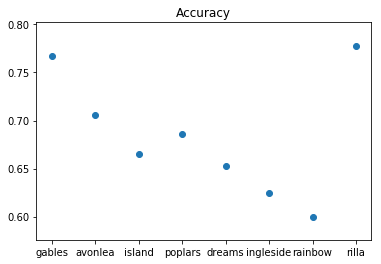

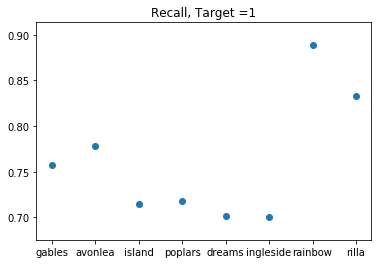

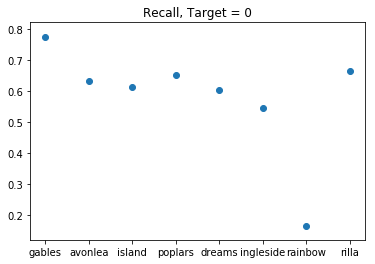

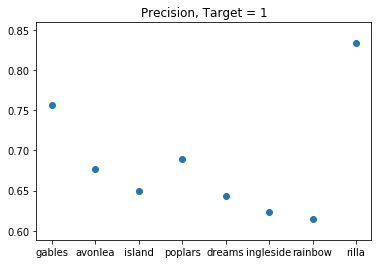

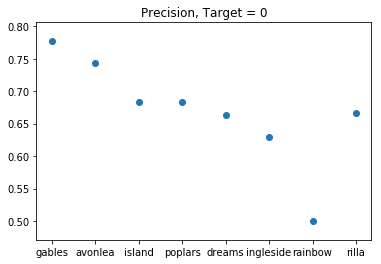

In [74]:
plt.scatter(books, df_acc.iloc[0])
plt.title("Accuracy")
plt.show()
plt.scatter(books, df_classification_recall1.iloc[0])
plt.title("Recall, Target =1")
plt.show()
plt.scatter(books, df_classification_recall0.iloc[0])
plt.title("Recall, Target = 0")
plt.show()
plt.scatter(books, df_classification_precision1.iloc[0])
plt.title("Precision, Target = 1")
plt.show()
plt.scatter(books, df_classification_precision0.iloc[0])
plt.title("Precision, Target = 0")
plt.show()

In [0]:
# #as compared to other nsubj sentences, using Marilla as comparison
# X_train, X_test, y_train, y_test = train_test_split(sentence_gables, target_gables)
# X_train_dreams, X_test_dreams, y_train_dreams, y_test_dreams = train_test_split(sentence_dreams, target_dreams)

# print("trained on AGG, tested on AGG")
# model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
# test(sentence_gables, model2, vectorizer, target_gables)

# print("trained on AGG, tested on AGG (control)(Marilla)")
# model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
# test(sentence_gables_Marilla, model2, vectorizer, target_gables_Marilla)

# print("trained on AHD, tested on AGG(Marilla) (control)")
# model2, vectorizer = train_classifier(X_train_dreams, y_train_dreams, prnt = False)
# test(sentence_gables_Marilla, model2, vectorizer, target_gables_Marilla)

# print("trained on AHD, tested on AHD")
# model2, vectorizer = train_classifier(X_train_dreams, y_train_dreams, prnt = False)
# test(X_test_dreams, model2, vectorizer, y_test_dreams)

# # print("trained on AGG, tested on AHD")
# # model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
# # test(X_test_dreams, model2, vectorizer, y_test_dreams)

# # print("trained on AHD, tested on AHD (control)")
# # model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
# # test(X_test_dreams, model2, vectorizer, y_test_dreams)

# # print("trained on AHD, tested on AGG")
# # model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
# # test(X_test, model2, vectorizer, y_test)

,gables,avonlea,island,poplars,dreams,ingleside,rainbow,rilla
0,0.264,0.229,0.739,0.307,0.663,0.687,0.583,0.250
1,0.760,0.759,0.779,0.296,0.709,0.691,0.833,0.125
2,0.750,0.251,0.253,0.296,0.670,0.728,0.750,0.125
3,0.651,0.314,0.686,0.288,0.706,0.671,0.167,0.000
4,0.683,0.287,0.691,0.292,0.367,0.687,0.583,0.250
5,0.681,0.256,0.746,0.277,0.695,0.317,0.417,0.250
6,0.573,0.466,0.500,0.511,0.479,0.512,0.250,0.625
7,0.496,0.473,0.487,0.431,0.567,0.520,0.500,0.500


In [0]:
import matplotlib.pyplot as plt
import networkx as nx

#function for visualizing character networks in a book
def gr(full_para_list):
    a = np.zeros((20, 20))

    x_lst = []
    for i in full_para_list:
        x_lst.extend(i) 
    # vectorized = vectorizer.transform(x_lst)

    for i in x_lst:
        chars = name_mapping.keys()
        dis_chars = []
        for ch in chars:
            if re.search(ch, i) and ch not in dis_chars:
                dis_chars.append(ch)
        for ch in dis_chars:
            for neighbor in dis_chars:
                a[name_mapping[ch]][name_mapping[neighbor]] += 1

    g1 = (nx.from_numpy_matrix((a- min(a.flatten()))/(max(a.flatten()) - min(a.flatten()))))
    #g1 = (nx.from_numpy_matrix((a)
    pos = nx.spring_layout(g1, k =1)
    weights = [g1[u][v]['weight'] for u,v in g1.edges]
    nx.draw(g1, pos = pos, width = weights)
    nx.draw_networkx_labels(g1, labels = dict(map(reversed, name_mapping.items())), pos = pos)
    plt.show()
    return a
    


In [0]:
# a_gables = gr(full_para_list_gables)
# a_dreams = gr(full_para_list_dreams)

# #printing co-occurrence values for Anne with Diana & Gilbert in AGG
# print(a_gables[1][6], a_gables[1][4])
# #printing co-occurrence values for Anne with Cornelia & Gilbert in AHD
# print(a_dreams[1][15], a_dreams[1][4])

In [0]:
# train_classifier(full_para_list_gables, target_gables, prnt = False)